# Project - House sale price predictioon with Linear-Regression
   **Task - Using `Linear-Regression` try to predict the sale price of house using `Ames-Housing-Dataset`**

**import `Esential Liabraries`**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_csv("C:/Users/Rahul/ML_data/NO_missing_values.csv")
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [3]:
df["MS SubClass"] =df["MS SubClass"].apply(str)

In [4]:
my_object_df = df.select_dtypes(include = 'object')
my_object_df

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [5]:
my_numeric_df = df.select_dtypes(exclude='object')
my_numeric_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.000000,31770,6,5,1960,1960,639,0,441,1080,...,210,62,0,0,0,0,0,5,2010,215000
1,80.000000,11622,5,6,1961,1961,468,144,270,882,...,140,0,0,0,120,0,0,6,2010,105000
2,81.000000,14267,6,6,1958,1958,923,0,406,1329,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.000000,11160,7,5,1968,1968,1065,0,1045,2110,...,0,0,0,0,0,0,0,4,2010,244000
4,74.000000,13830,5,5,1997,1998,791,0,137,928,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,819,0,184,1003,...,120,0,0,0,0,0,0,3,2006,142500
2921,75.144444,8885,5,5,1983,1983,301,324,239,864,...,164,0,0,0,0,0,0,6,2006,131000
2922,62.000000,10441,5,5,1992,1992,337,0,575,912,...,80,32,0,0,0,0,700,7,2006,132000
2923,77.000000,10010,5,5,1974,1975,1071,123,195,1389,...,240,38,0,0,0,0,0,4,2006,170000


In [6]:
dummy_df = pd.get_dummies(my_object_df, drop_first = True)
dummy_df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [7]:
final_df = pd.concat([dummy_df, my_numeric_df], axis= 1)
final_df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2921,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2922,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2923,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 717 entries, MS SubClass_150 to SalePrice
dtypes: float64(1), int64(34), uint8(682)
memory usage: 2.7 MB


**I - The label we are try to predict is `sales_price` column . seprate our X `Features` and y `labels`**  

In [9]:
X = final_df.drop('SalePrice', axis = 1)
X.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0,0,0,0,1,0,0,0,0,0,...,528,210,62,0,0,0,0,0,5,2010
1,0,0,0,0,1,0,0,0,0,0,...,730,140,0,0,0,120,0,0,6,2010
2,0,0,0,0,1,0,0,0,0,0,...,312,393,36,0,0,0,0,12500,6,2010
3,0,0,0,0,1,0,0,0,0,0,...,522,0,0,0,0,0,0,0,4,2010
4,0,0,0,0,0,0,0,0,0,1,...,482,212,34,0,0,0,0,0,3,2010


In [10]:
y = final_df['SalePrice']
y.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

**II - Now splitting the features and labels into `Train|Test` dataset**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

**III - The dataset has variety of units. for optimal Regression result scale the X features**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
# now fit the X_train dataset and then transform it
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
# now only transform the X_test dataset
X_test = scaler.transform(X_test)

**IV - We use `ElasticNet` as our base model. later we use gridsearch for cross-validation**

In [18]:
from sklearn.linear_model import ElasticNet

In [33]:
base_model = ElasticNet(max_iter = 1000000)

**V - ElasticNet model has two main parameters `alpha and L1_ratio`. Create a dictionary of these two parameters grid values**

In [24]:
params_grids = {'alpha': [0.1, 1, 5, 10, 100],
              'l1_ratio': [.1, .5, .7, .99, 1]}

**VI - Using scikit-learn to create a GridsearchCV object and run a grid search for best your model based on scaled data**

In [28]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid_model = GridSearchCV(base_model, params_grids, verbose = 1,
                          scoring = 'neg_mean_squared_error',
                          cv = 5)
grid_model

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
# Fit the data on our grid-search 
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Rahul\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232903762398.28397, tolerance: 1355206692.5276783
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rahul\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216554997750.90945, tolerance: 1307913805.6588457
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rahul\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246468915711.57233, tolerance: 1415056940.0061066
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rahul\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

**if you get lot's of warning after fit your grid model than you can increase the `max_iter` in your `base_model`**

**VII display the best vombination of parameters for our model**

In [35]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

**VIII - Evalute your model performance on unseen test data**

In [37]:
y_pred = grid_model.predict(X_test)
y_pred[:10]

array([101337.30611506, 330898.3945319 , 202269.85570642, 197712.85027537,
       104771.19226617, 146498.70742862, 134049.49060886, 345837.28507141,
        79886.29419953, 202522.44350975])

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
# evaluate
MSE = mean_squared_error(y_test, y_pred)
MSE

424956230.42212

In [43]:
RMSE = np.sqrt(MSE)
RMSE

20614.46653256203

In [44]:
MAE =  mean_absolute_error(y_test, y_pred)

In [45]:
MAE

14675.727845265259

In [46]:
np.mean(df['SalePrice'])

180815.53743589742

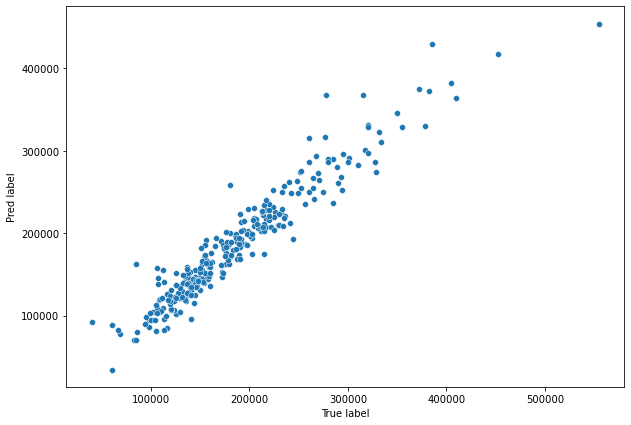

In [49]:
# now let's plot our our prediction with our real labels
plt.figure(figsize=(10,7))
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel("True label")
plt.ylabel('Pred label');